# Credit card Fraud Detection Preddiction Model -Task 1(Codsoft)

 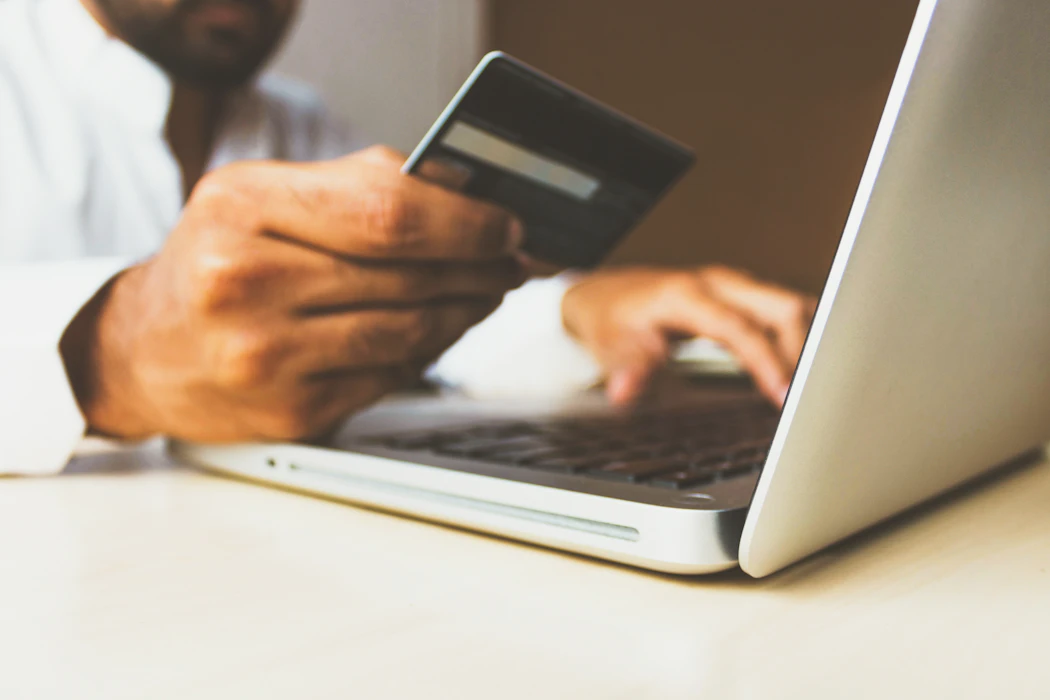

# 1. Import libraries

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

ModuleNotFoundError: No module named 'lightgbm'

# 2.Read csv

In [3]:
dc=pd.read_csv(r'creditcard.csv')

In [4]:
dc.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
dc.shape

(284807, 31)

In [6]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
dc.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
dc.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

# Summary Statistics

In [9]:
dc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Visualizaing data spread

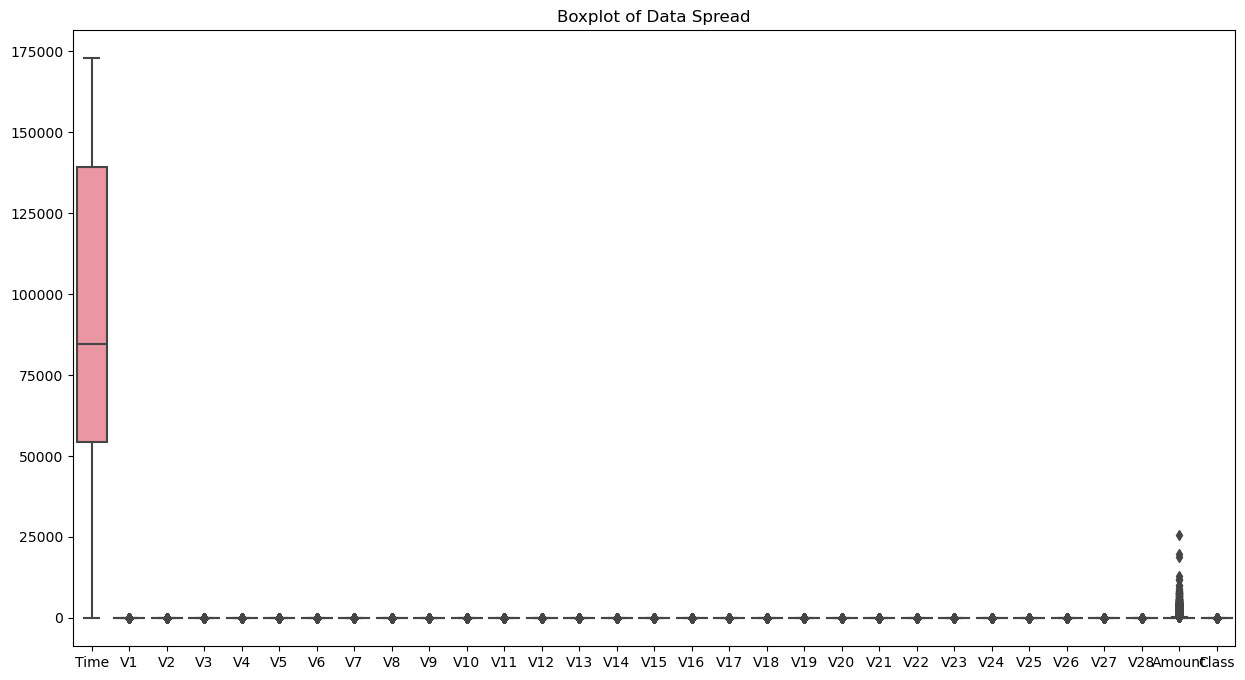

In [10]:
# Visualize data spread with a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=dc)
plt.title("Boxplot of Data Spread")
plt.show()


# Checking for outliers

<Figure size 1500x800 with 0 Axes>

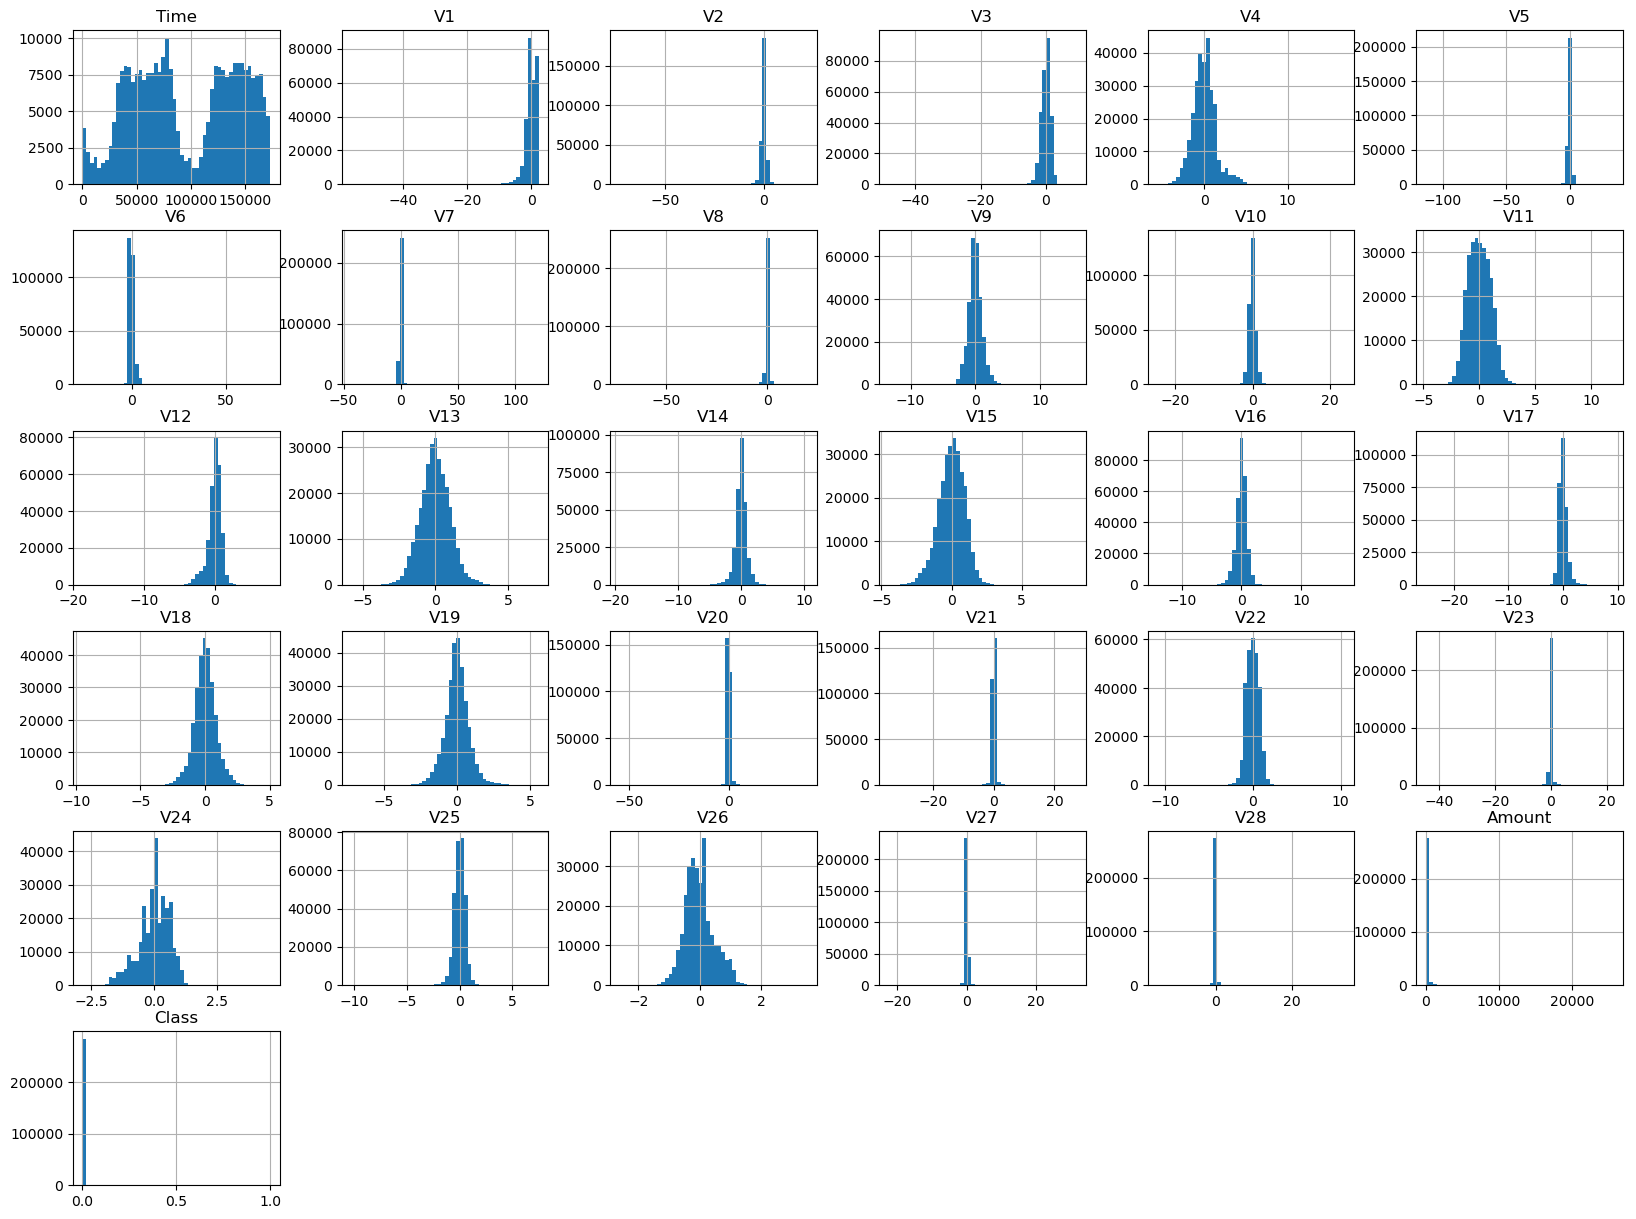

In [11]:
# Visualize distribution and outliers with a histogram
plt.figure(figsize=(15, 8))
dc.hist(bins=50, figsize=(20, 15))
plt.title("Histogram of Features")
plt.show()


In [12]:
# Identify and handle outliers using z-score
from scipy.stats import zscore

z_scores = zscore(dc)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_no_outliers = dc[filtered_entries]



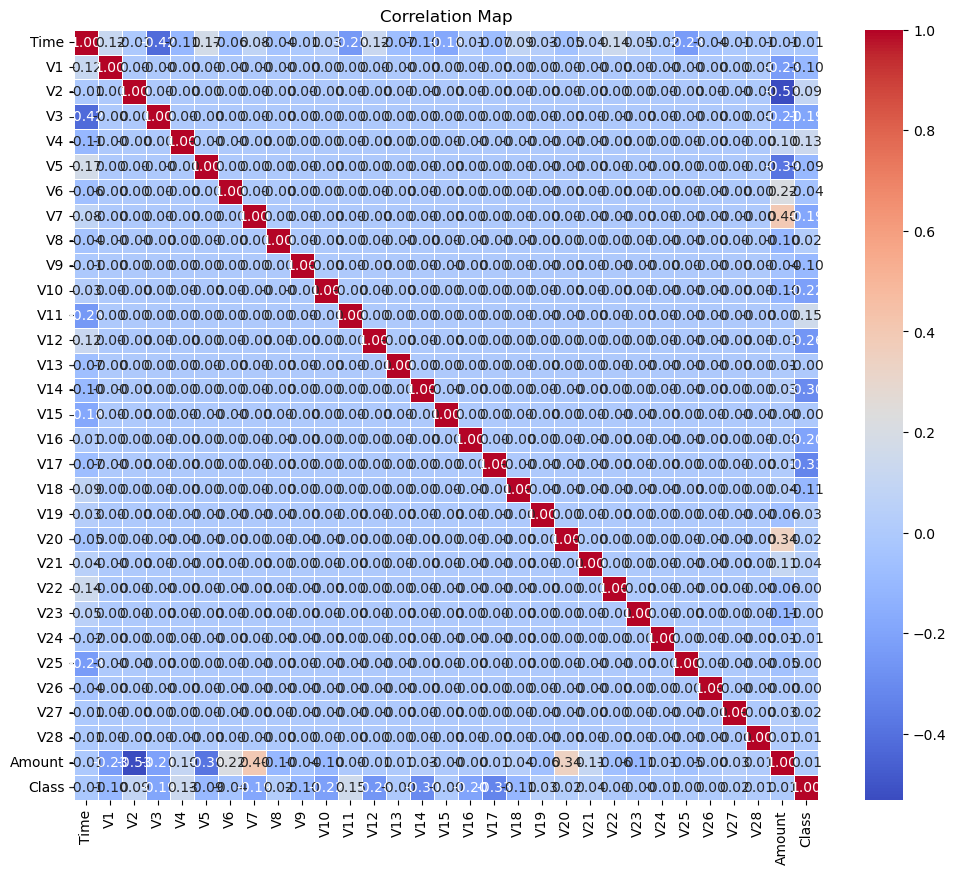

In [13]:
# Calculate correlation matrix
correlation_matrix = dc.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Map")
plt.show()


# Let's check Imbalance Data

In [14]:
# Check the distribution of the target variable
class_distribution= dc['Class'].value_counts()
class_distribution

0    284315
1       492
Name: Class, dtype: int64

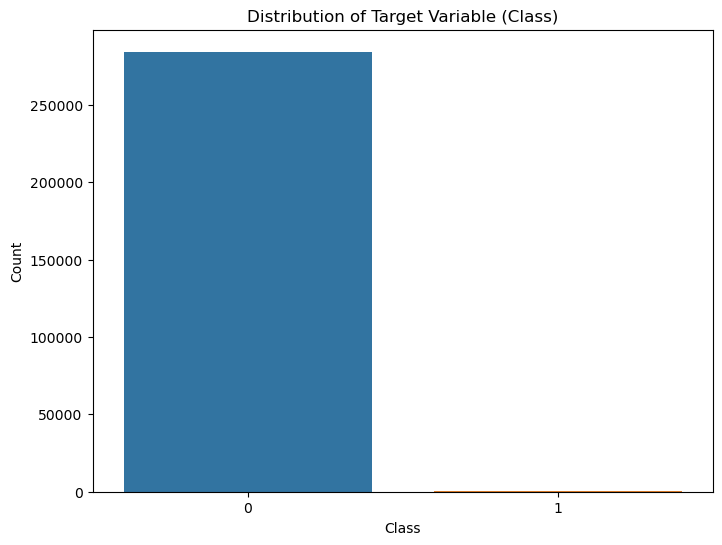

In [15]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=dc)
plt.title("Distribution of Target Variable (Class)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [16]:
imbalance_ratio = class_distribution[1] / class_distribution[0]
imbalance_percentage = (class_distribution[1] / dc.shape[0]) * 100

print("Imbalance Ratio:", imbalance_ratio)
print("Imbalance Percentage:", imbalance_percentage, "%")



Imbalance Ratio: 0.0017304750013189597
Imbalance Percentage: 0.1727485630620034 %


Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

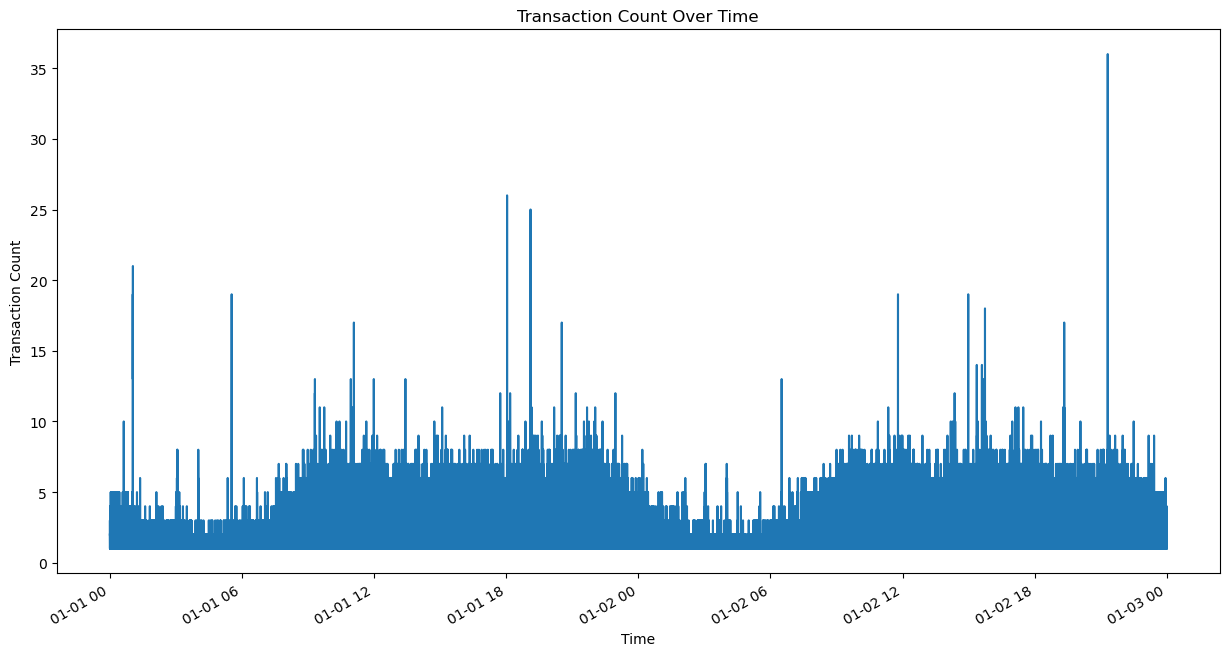

In [17]:


# Convert the 'Time' column to a datetime object
dc['Time'] = pd.to_datetime(dc['Time'], unit='s')

# Group by time and count the number of transactions
transaction_count_by_time = dc.groupby('Time').size()

# Plot the transaction count over time
plt.figure(figsize=(15, 8))
transaction_count_by_time.plot(kind='line')
plt.title('Transaction Count Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Count')
plt.show()


In [18]:
import pandas as pd
import plotly.figure_factory as ff
from plotly.offline import iplot
import numpy as np
import datetime as dt
# Convert 'Time' to seconds since the minimum time
dc['Time_seconds'] = (dc['Time'] - dc['Time'].min()).dt.total_seconds().astype(int)

class_0 = dc.loc[dc['Class'] == 0]["Time_seconds"]
class_1 = dc.loc[dc['Class'] == 1]["Time_seconds"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

# Plot Time density plot
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

# Extract Hour and calculate statistics for the Amount column
dc['Hour'] = dc['Time'].dt.hour

tmp = dc.groupby(['Hour', 'Class'])['Amount'].agg(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
dc_stats = pd.DataFrame(tmp)
dc_stats.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
dc_stats.head()



,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0,0,0.0,7712.43,7689,462388.19,60.136323,12.140,33685.163962
1,0,1,0.0,829.41,6,1820.07,303.345000,230.240,123876.728670
2,1,0,0.0,2481.60,4210,263046.13,62.481266,18.965,21224.975009
3,1,1,1.0,600.73,10,1279.32,127.932000,45.725,36794.143751
4,2,0,0.0,18910.00,3271,229302.70,70.101712,17.450,144596.199828


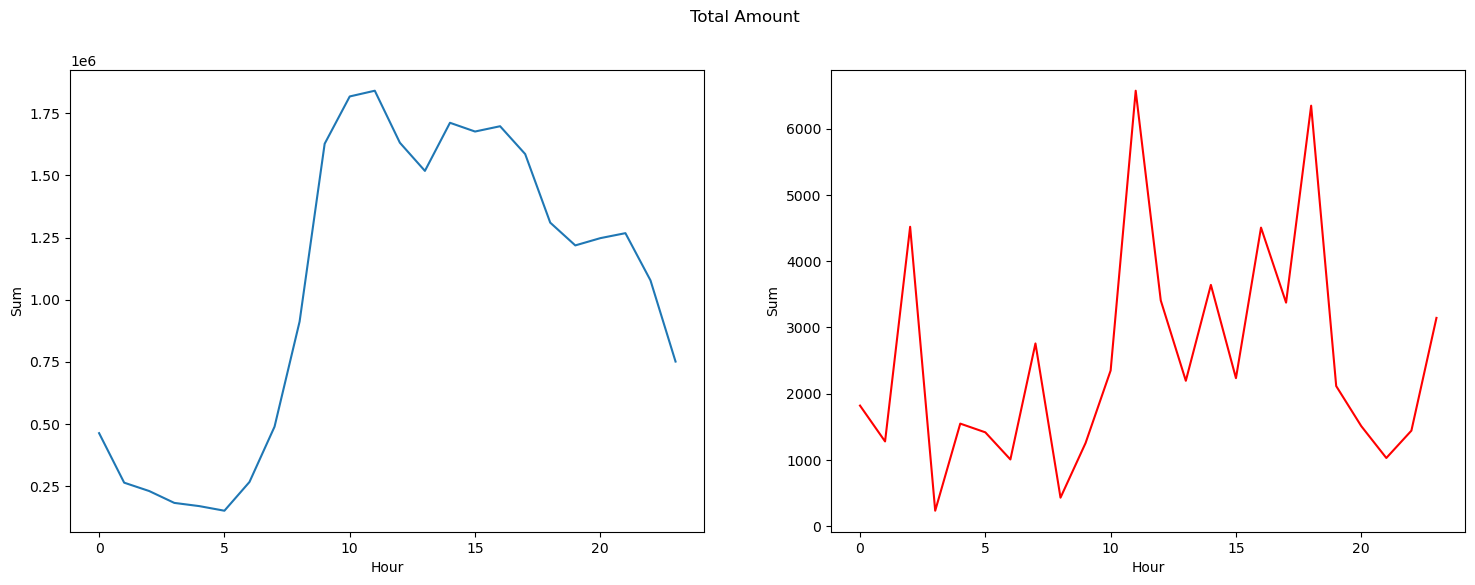

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Use tmp[tmp['Class'] == 0] and tmp[tmp['Class'] == 1] for correct indexing
s = sns.lineplot(ax=ax1, x="Hour", y="Sum", data=tmp[tmp['Class'] == 0])
s = sns.lineplot(ax=ax2, x="Hour", y="Sum", data=tmp[tmp['Class'] == 1], color="red")

plt.suptitle("Total Amount")
plt.show()


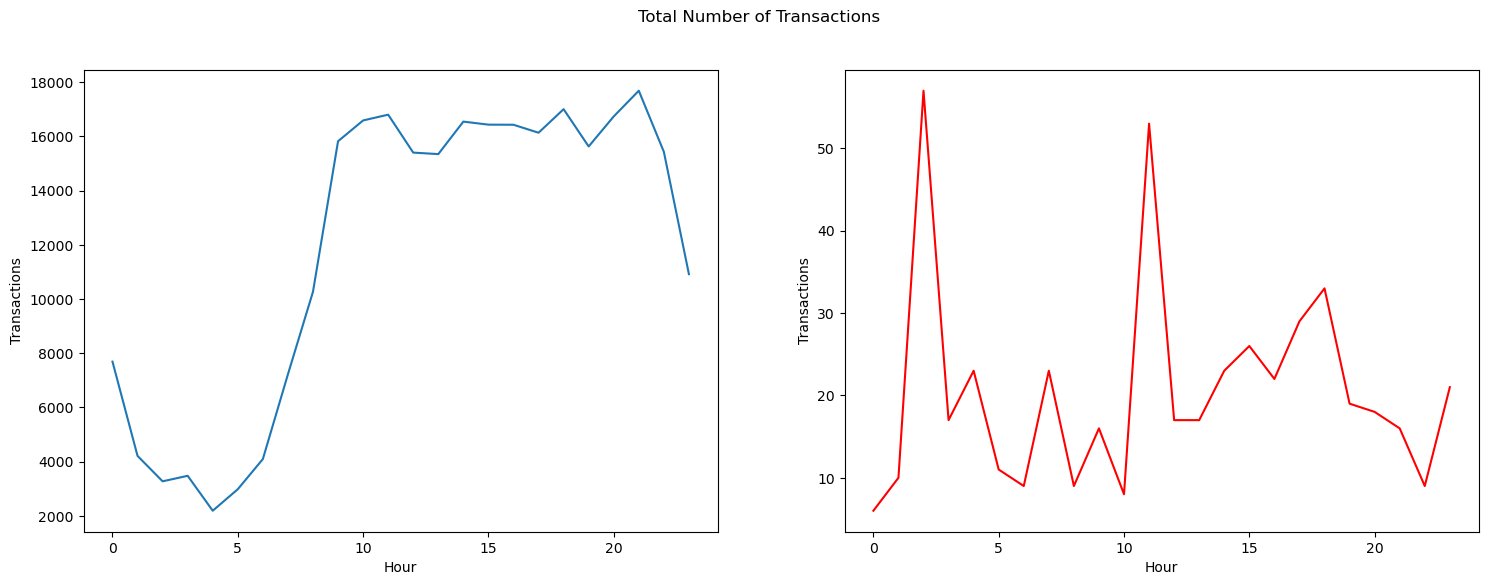

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=tmp[tmp.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=tmp[tmp.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

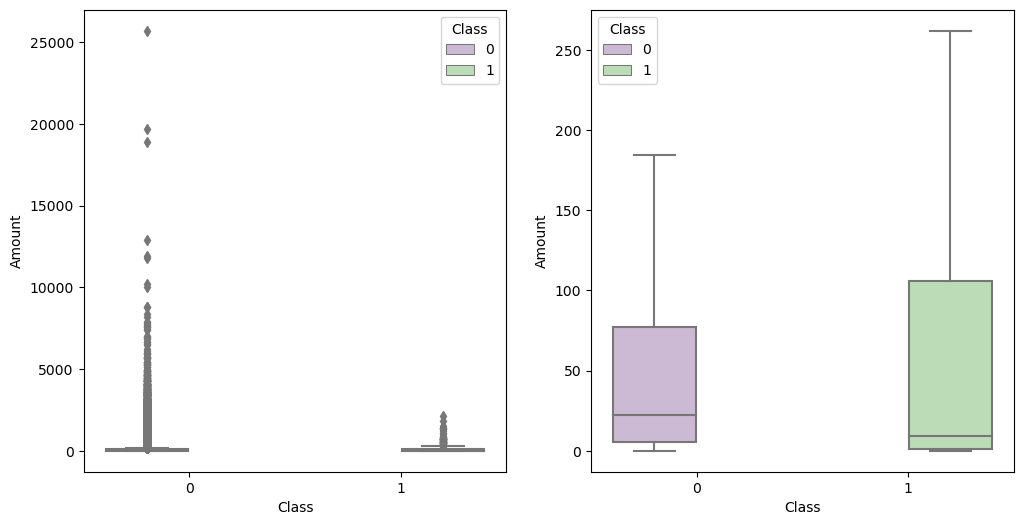

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=dc, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=dc, palette="PRGn",showfliers=False)
plt.show();

In [22]:
tmp = dc[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
tmp = dc[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

In [24]:
dc.groupby('Class').mean()

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_1180\2338977969.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_seconds,Hour
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,94838.202258,14.050623
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,80746.806911,11.646341


# Under-Sampling

The difference between mean values of normal transaction(0) and fraudulent transaction(1) is huge,so we have to create a sample dataset of normal distribution.

Number of Fradukent transaction------> 492



# Predictive model


In [28]:
legit=dc[dc.Class==0]
fradulent=dc[dc.Class==1]
print(legit.shape)
print(fradulent.shape)

(284315, 33)
(492, 33)


In [29]:
legit_sample=legit.sample(n=492)

#### Conacatenating two dataframes

In [33]:
new_dc=pd.concat([legit_sample,fradulent],axis=0)
new_dc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_seconds,Hour
74660,1970-01-01 15:28:11,-0.860079,0.920504,0.926304,0.022981,0.989495,-0.910581,0.706745,0.132294,-0.611930,...,-0.339545,-0.168135,0.361219,-0.480605,0.060686,0.116763,1.00,0,55691,15
161887,1970-01-02 07:50:10,1.991061,-0.063890,-1.700590,0.290800,0.164044,-0.743501,-0.063330,-0.041750,0.935283,...,0.151761,-0.537438,-0.098523,-0.079410,-0.014074,-0.037317,10.00,0,114610,7
78335,1970-01-01 15:58:00,-0.446080,0.839763,1.747814,2.507376,-0.029250,0.639291,0.684744,0.197583,-0.793769,...,0.058391,0.081786,-0.381741,0.099673,0.156597,0.164686,80.46,0,57480,15
125944,1970-01-01 21:37:50,-2.016384,1.894975,0.458527,-0.154420,-0.949695,-0.368804,-0.445903,1.235808,-0.441141,...,0.155545,0.164288,-0.314134,0.019453,-0.558313,-0.266905,11.98,0,77870,21
209107,1970-01-02 14:10:17,1.501746,-1.159761,-0.271425,0.787813,-1.043667,-0.235266,-0.301722,-0.081175,1.757589,...,0.082035,-0.016422,-0.302097,-0.889115,0.044130,0.014996,240.00,0,137417,14


In [34]:
new_dc.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_seconds,Hour
279863,1970-01-02 22:59:02,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,169142,22
280143,1970-01-02 23:02:27,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,169347,23
280149,1970-01-02 23:02:31,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,169351,23
281144,1970-01-02 23:12:46,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,169966,23
281674,1970-01-02 23:19:08,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1,170348,23


In [36]:
new_dc['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [37]:
new_dc.groupby('Class').mean()

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_1180\2790375077.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_seconds,Hour
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.022158,0.057981,0.020907,-0.036519,-0.026505,-0.012016,0.032888,-0.053723,0.124690,0.009087,...,0.097506,0.009916,-0.035619,-0.006981,0.001172,-0.004719,-0.005511,94.974431,93388.605691,14.152439
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,80746.806911,11.646341


#### Splitting the data

In [42]:

# Separate features (X) and target variable (y)

X = new_dc.drop('Class',axis = 1)
y =new_dc['Class']

In [43]:
print(X)

                      Time        V1        V2        V3        V4        V5  \
74660  1970-01-01 15:28:11 -0.860079  0.920504  0.926304  0.022981  0.989495   
161887 1970-01-02 07:50:10  1.991061 -0.063890 -1.700590  0.290800  0.164044   
78335  1970-01-01 15:58:00 -0.446080  0.839763  1.747814  2.507376 -0.029250   
125944 1970-01-01 21:37:50 -2.016384  1.894975  0.458527 -0.154420 -0.949695   
209107 1970-01-02 14:10:17  1.501746 -1.159761 -0.271425  0.787813 -1.043667   
...                    ...       ...       ...       ...       ...       ...   
279863 1970-01-02 22:59:02 -1.927883  1.125653 -4.518331  1.749293 -1.566487   
280143 1970-01-02 23:02:27  1.378559  1.289381 -5.004247  1.411850  0.442581   
280149 1970-01-02 23:02:31 -0.676143  1.126366 -2.213700  0.468308 -1.120541   
281144 1970-01-02 23:12:46 -3.113832  0.585864 -5.399730  1.817092 -0.840618   
281674 1970-01-02 23:19:08  1.991976  0.158476 -2.583441  0.408670  1.151147   

              V6        V7        V8   

In [44]:
print(y)

74660     0
161887    0
78335     0
125944    0
209107    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


#### Splitting the data into test and training data

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [51]:
print(X.shape,X_train.shape,X_test.shape)

(984, 32) (787, 32) (197, 32)


In [75]:
print(X_train.dtypes)
print(y_train.dtypes)


Time            datetime64[ns]
V1                     float64
V2                     float64
V3                     float64
V4                     float64
V5                     float64
V6                     float64
V7                     float64
V8                     float64
V9                     float64
V10                    float64
V11                    float64
V12                    float64
V13                    float64
V14                    float64
V15                    float64
V16                    float64
V17                    float64
V18                    float64
V19                    float64
V20                    float64
V21                    float64
V22                    float64
V23                    float64
V24                    float64
V25                    float64
V26                    float64
V27                    float64
V28                    float64
Amount                 float64
Time_seconds             int32
Hour                     int64
dtype: o

In [76]:
# Assuming 'Time' is the datetime column
X_train['Time_seconds'] = (X_train['Time'] - X_train['Time'].min()).dt.total_seconds()
X_test['Time_seconds'] = (X_test['Time'] - X_test['Time'].min()).dt.total_seconds()

# Extract hour from 'Time'
X_train['Hour'] = X_train['Time'].dt.hour
X_test['Hour'] = X_test['Time'].dt.hour


In [77]:
X_train = X_train.drop(['Time'], axis=1)
X_test = X_test.drop(['Time'], axis=1)


In [78]:
y_train = y_train.astype(int)


In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### Model Evaluation

### Accuracy Score

In [82]:
from sklearn.metrics import accuracy_score
# Accuracy on training data
X_train_prediction= model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction,y_train)

In [83]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9479034307496823


In [84]:
# Accuracy on test data
X_test_prediction= model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,y_test)


In [85]:
print('Accuracy score on test data:',test_data_accuracy)

Accuracy score on test data: 0.9187817258883249


## Conclusion

##### As the accuracy score is not showing variation ,so we can assume the best fitting of the model.